In [1]:
from myusefultools.pyopenfoam import OpenFOAM
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator

from myusefultools.he_utilities import set_matplotlib_customization
set_matplotlib_customization(plt)

In [2]:
of = OpenFOAM(
    path_case=Path("coded_twenty"), 
    path_template=".")

In [3]:
of.foam_to_vtk()

rm: cannot remove 'VTK': No such file or directory
rm: cannot remove 'VTK_soilProperties': No such file or directory


In [4]:
igt = 0
fields = ["XAR", "Sw"]
scalars = {f: of.read_field_all_times(f) for f in fields}

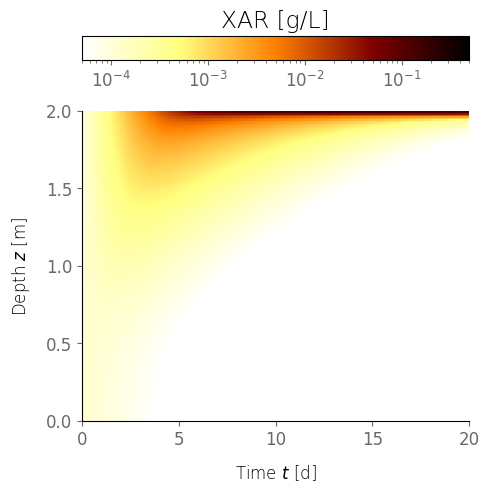

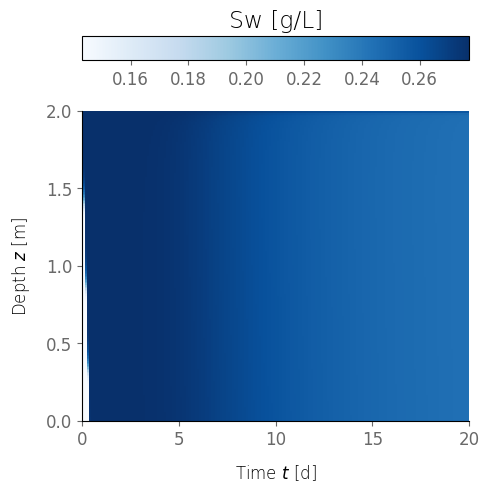

In [5]:
for k, scalar in scalars.items():
    fig, (cax, ax) = plt.subplots(
            2, 1, figsize=[5, 5], gridspec_kw={"height_ratios": [0.4, 5], "hspace":0.3}, sharex=False
        )

    if k == "XAR":
        pcolor_kwargs = dict( 
            cmap="afmhot_r",
            norm=colors.LogNorm(vmin=5.0e-5, vmax=5e-1)
        )
    else:
        pcolor_kwargs = dict(
            cmap="Blues"
        )
    
    img = ax.pcolormesh(scalar.t[igt:] / 86400, scalar.z, scalar[:, igt:],**pcolor_kwargs)
    ax.set_ylim(0,2)
    ax.set_xlim(0, 20.01)

    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(4))

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)

    ax.set_xlabel("Time $t$ [d]")
    ax.set_ylabel("Depth $z$ [m]")
    plt.colorbar(img, cax=cax, orientation="horizontal")
    cax.set_title(f"{k} [g/L]", fontdict=dict(weight=100))
    # fig.tight_layout()
    fig.set_facecolor(color="#FFFFFF00")
    plt.show()

# plt.savefig("PNG/XAR.png", dpi=400, bbox_inches="tight", pad_inches=0.1)

In [6]:
of.boundaryProbes_to_txt()
of.process_boundaryProbes()

points_Sw_h.xy points_U.xy
Processed points_Sw_h.xy !
Processed points_U.xy !


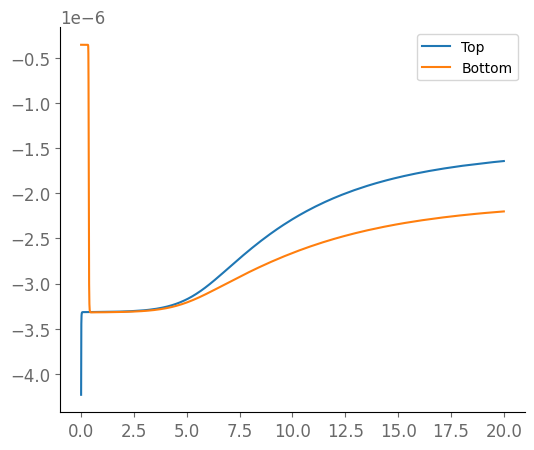

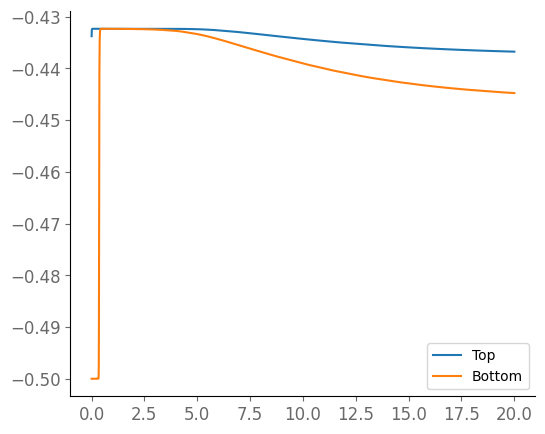

In [7]:
for bp in of.boundaryProbes:
    for k, v in bp.array_data.items():
        if k == "Uz" or k == "h": 
            fig, ax = plt.subplots(figsize=[6, 5])
            # ax.plot(v.time, v.values[0])
            ax.plot(v.time/86400, v.values[1], label="Top")
            ax.plot(v.time/86400, v.values[0], label="Bottom")

            ax.legend()
            # v.plot.line(x="time", ax=ax, lw=1)
            plt.show()